In [4]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel

In [5]:
training_folder = '../../'

In [6]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/walk_model.zip')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 21.30it/s]


# required fields !

In [7]:
sm.links['headway'] = 300
sm.links['length'] = sm.links['road_length']

# rail

In [8]:
rail = sm.copy()
rail.links = rail.links.loc[rail.links['route_type'].isin([ 'subway'])] # ['tram', 'subway', 'rail']

In [9]:
rail.step_pt_pathfinder(
    broken_routes=True,
    broken_modes=False,
    route_column='route_id',
    mode_column='route_type',
    speedup=True
)

path_analysis: 100%|██████████████████████████████████████████████████████████| 29532/29532 [00:00<00:00, 30923.42it/s]


In [10]:
rail.pt_los.set_index(['origin', 'destination'])['pathfinder_session'].value_counts()

route_braker    17432
best_path       12100
Name: pathfinder_session, dtype: int64

In [11]:
sm.links.drop(['index'],axis=1,inplace=True,errors='ignore' )

In [12]:
sm.step_pt_pathfinder(
    broken_routes=False,
    broken_modes=True
)

path_analysis: 100%|██████████████████████████████████████████████████████████| 53974/53974 [00:02<00:00, 26773.01it/s]


In [13]:
pathfound = sm.copy()

In [14]:
import pandas as pd
pathfound.pt_los = pd.concat(
    [sm.pt_los, rail.pt_los]
).drop_duplicates(subset=['path'])

In [15]:
pathfound.pt_los.set_index(['origin', 'destination'])['pathfinder_session'].value_counts()

mode_braker     41874
route_braker    16895
best_path       12100
Name: pathfinder_session, dtype: int64

# display

In [16]:
projected = pathfound.change_epsg(4326, 'degree')

Reprojecting model from epsg 2154 to epsg 4326: 100%|██████████████████████████████████| 31/31 [00:03<00:00,  9.17it/s]


In [17]:
from quetzal.io import display
from imp import reload
reload(display)

<module 'quetzal.io.display' from '../../../quetzal\\quetzal\\io\\display.py'>

In [20]:
sm.pt_los.sort_values(['origin','destination'])

,broken_modes,destination,gtime,origin,path,pathfinder_session,reversed,alighting_links,alightings,boarding_links,boardings,footpaths,link_path,node_path,ntlegs,transfers,all_walk,time_link_path,length_link_path
10780,NaN,zone_0,0.000000,zone_0,"(zone_0,)",best_path,False,[],[],[],[],[],[],[],[],[],True,0.0,0.000000
10781,NaN,zone_1,553.182469,zone_0,"(zone_0, 211, zone_1)",best_path,False,[],[],[],[],[],[],[211],"[(zone_0, 211), (211, zone_1)]",[],True,0.0,0.000000
10785,NaN,zone_10,1127.765021,zone_0,"(zone_0, 108, link_19680, link_19681, link_196...",best_path,False,[link_19685],[363],[link_19680],[108],[],"[link_19680, link_19681, link_19682, link_1968...","[108, 363]","[(zone_0, 108), (363, zone_10)]",[],False,420.0,3446.660267
10793,"{rail, bus, subway, tram}",zone_10,2036.173373,zone_0,"(zone_0, 259, 84, 66, 15, zone_10)",mode_braker,False,[],[],[],[],"[(259, 84), (84, 66), (66, 15)]",[],"[259, 84, 66, 15]","[(zone_0, 259), (15, zone_10)]",[],True,0.0,0.000000
10809,"{rail, bus, tram}",zone_10,1786.869267,zone_0,"(zone_0, 259, 84, 423, link_15409, link_15410,...",mode_braker,False,[link_15410],[363],[link_15409],[423],"[(259, 84), (84, 423)]","[link_15409, link_15410]","[259, 84, 423, 363]","[(zone_0, 259), (363, zone_10)]",[],False,120.0,NaN
10847,NaN,zone_100,1964.646796,zone_0,"(zone_0, 211, link_9917, link_9918, link_9919,...",best_path,False,[link_9929],[398],[link_9917],[211],[],"[link_9917, link_9918, link_9919, link_9920, l...","[211, 398]","[(zone_0, 211), (398, zone_100)]",[],False,960.0,NaN
10870,"{rail, bus, subway, tram}",zone_100,5318.967110,zone_0,"(zone_0, 211, zone_1, 147, 456, zone_3, 73, zo...",mode_braker,False,[],[],[],[],"[(147, 456), (120, 303), (329, 429)]",[],"[211, 147, 456, 73, 233, 120, 303, 329, 429]","[(zone_0, 211), (211, zone_1), (zone_1, 147), ...",[],True,0.0,0.000000
10876,"{bus, subway, tram}",zone_100,4287.455407,zone_0,"(zone_0, 297, 287, link_9413, 275, zone_26, 12...",mode_braker,False,[link_9413],[275],[link_9413],[287],"[(297, 287), (120, 303), (329, 429)]",[link_9413],"[297, 287, 275, 120, 303, 329, 429]","[(zone_0, 297), (275, zone_26), (zone_26, 120)...",[],False,240.0,NaN
10889,"{rail, tram, subway}",zone_100,2790.760440,zone_0,"(zone_0, 108, link_6982, link_6983, link_6984,...",mode_braker,False,"[link_6984, link_7140, link_7697]","[114, 233, 398]","[link_6982, link_7135, link_7690]","[108, 114, 233]",[],"[link_6982, link_6983, link_6984, link_7135, l...","[108, 114, 233, 398]","[(zone_0, 108), (398, zone_100)]","[114, 233]",False,1080.0,6059.126560
10867,NaN,zone_101,2115.274215,zone_0,"(zone_0, 211, link_15355, link_15356, link_153...",best_path,False,"[link_15357, link_10226]","[254, 39]","[link_15355, link_10221]","[211, 254]",[],"[link_15355, link_15356, link_15357, link_1022...","[211, 254, 39]","[(zone_0, 211), (39, zone_101)]",[254],False,600.0,NaN


In [18]:
display.all_pt_paths(projected, 'zone_10',  'zone_78', color_column='route_color', group_name='route_short_name')

6 paths


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.39it/s]


In [71]:
pathfound.to_zip(training_folder + 'model/transport/multi_pathfinder.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  5.95it/s]


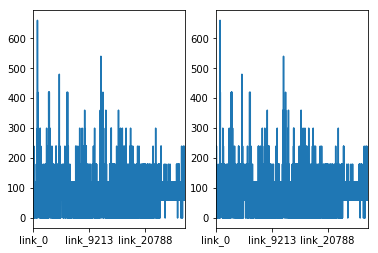

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)                # the first figure
plt.subplot(121)  # the first subplot in the first figure
sm.links['time'].plot()
plt.subplot(122)             # the second subplot in the first figure
sm.links['time'].plot()